In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

In [ ]:
style.use('seaborn-poster')
style.use('fivethirtyeight')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Application_Data = pd.read_csv("application_data.csv")
Previous_Application = pd.read_csv("previous_application.csv")

FileNotFoundError: ignored

In [ ]:
Application_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Previous_Application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("The dimension of Application_data:",Application_Data.shape)
print("The dimension of Previous_Application:",Previous_Application.shape)

The dimension of Application_data: (7760, 122)
The dimension of Previous_Application: (4196, 37)


In [ ]:
print("The size of Application_data:",Application_Data.size)
print("The size of Previous_Application:",Previous_Application.size)

The size of Application_data: 946720
The size of Previous_Application: 155252


In [ ]:
Application_Data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    float64
 18   DAYS_E

In [ ]:
Previous_Application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   4196 non-null   int64  
 1   SK_ID_CURR                   4196 non-null   int64  
 2   NAME_CONTRACT_TYPE           4196 non-null   object 
 3   AMT_ANNUITY                  3394 non-null   float64
 4   AMT_APPLICATION              4196 non-null   float64
 5   AMT_CREDIT                   4196 non-null   float64
 6   AMT_DOWN_PAYMENT             2321 non-null   float64
 7   AMT_GOODS_PRICE              3378 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   4196 non-null   object 
 9   HOUR_APPR_PROCESS_START      4196 non-null   int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  4196 non-null   object 
 11  NFLAG_LAST_APPL_IN_DAY       4196 non-null   int64  
 12  RATE_DOWN_PAYMENT            2321 non-null   float64
 13  RATE_INTEREST_PRIM

In [ ]:
Application_Data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,7760.000000,7760.000000,7760.000000,7.760000e+03,7.760000e+03,7760.000000,7.755000e+03,7759.000000,7759.000000,7759.000000,...,7759.000000,7759.000000,7759.000000,7759.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000
mean,104530.748969,0.077062,0.413273,1.672455e+05,6.004550e+05,27071.067526,5.400644e+05,0.021036,-16041.853718,64030.546849,...,0.006960,0.000258,0.000387,0.000258,0.007447,0.008043,0.033810,0.271522,0.268245,1.886804
std,2614.054159,0.266707,0.715814,9.492550e+04,4.022087e+05,14428.599561,3.691922e+05,0.013959,4337.339972,141480.694138,...,0.083139,0.016054,0.019661,0.016054,0.087697,0.121786,0.197302,0.928392,0.614135,1.862868
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102273.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16407.000000,2.385000e+05,0.010006,-19599.000000,-2801.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104538.500000,0.000000,0.000000,1.440000e+05,5.096025e+05,25033.500000,4.500000e+05,0.018850,-15811.000000,-1221.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,106807.250000,0.000000,1.000000,2.025000e+05,8.100000e+05,34587.000000,6.795000e+05,0.028663,-12434.500000,-291.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,109052.000000,1.000000,7.000000,1.935000e+06,2.925000e+06,135936.000000,2.925000e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


In [ ]:
Previous_Application.describe()


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,4.196000e+03,4196.000000,3394.000000,4.196000e+03,4.196000e+03,2321.000000,3.378000e+03,4196.000000,4196.000000,2321.000000,...,18.000000,4196.000000,4.196000e+03,3394.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,1.925214e+06,279093.381792,14055.391724,1.508402e+05,1.692534e+05,6161.016153,1.873669e+05,12.606053,0.995710,0.077982,...,0.815568,-932.831268,1.342132e+03,14.285798,343737.764684,14641.082305,31577.251777,74066.055743,79284.543584,0.271605
std,5.357930e+05,101311.975416,12710.391539,2.559279e+05,2.813506e+05,15309.700793,2.729813e+05,3.318306,0.065364,0.104822,...,0.082054,809.888863,6.176444e+04,12.801331,86105.767096,74356.562642,103857.292043,147895.111805,151557.068877,0.444870
min,1.000140e+06,100077.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.000000,...,0.568710,-2920.000000,-1.000000e+00,0.000000,-2870.000000,-2889.000000,-2783.000000,-2829.000000,-2725.000000,0.000000
25%,1.471491e+06,192871.500000,5968.428750,2.513588e+04,2.891362e+04,0.000000,4.690800e+04,10.000000,1.000000,0.000000,...,0.835095,-1452.500000,-1.000000e+00,6.000000,365243.000000,-1690.000000,-1344.000000,-1395.000000,-1347.000000,0.000000
50%,1.918196e+06,277871.500000,10030.185000,6.781275e+04,7.490025e+04,1575.000000,9.221175e+04,12.000000,1.000000,0.050514,...,0.852537,-612.500000,2.500000e+01,12.000000,365243.000000,-811.000000,-409.000000,-543.000000,-508.000000,0.000000
75%,2.385848e+06,366161.500000,17439.086250,1.485000e+05,1.707041e+05,7762.500000,1.825774e+05,15.000000,1.000000,0.108914,...,0.867336,-299.000000,1.422500e+02,18.000000,365243.000000,-389.000000,79.000000,-88.000000,-53.000000,1.000000
max,2.843527e+06,456210.000000,131892.660000,2.700000e+06,3.020760e+06,489600.000000,2.700000e+06,22.000000,1.000000,0.818315,...,0.867336,-3.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# **Data Cleaning and Manipulation**

**A. Application_Data Missing Values( & Dropping It)**

In [ ]:
round(Application_Data.isnull().sum() / Application_Data.shape[0] * 100.00,2)


SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.48
AMT_REQ_CREDIT_BUREAU_WEEK    13.48
AMT_REQ_CREDIT_BUREAU_MON     13.48
AMT_REQ_CREDIT_BUREAU_QRT     13.48
AMT_REQ_CREDIT_BUREAU_YEAR    13.48
Length: 122, dtype: float64

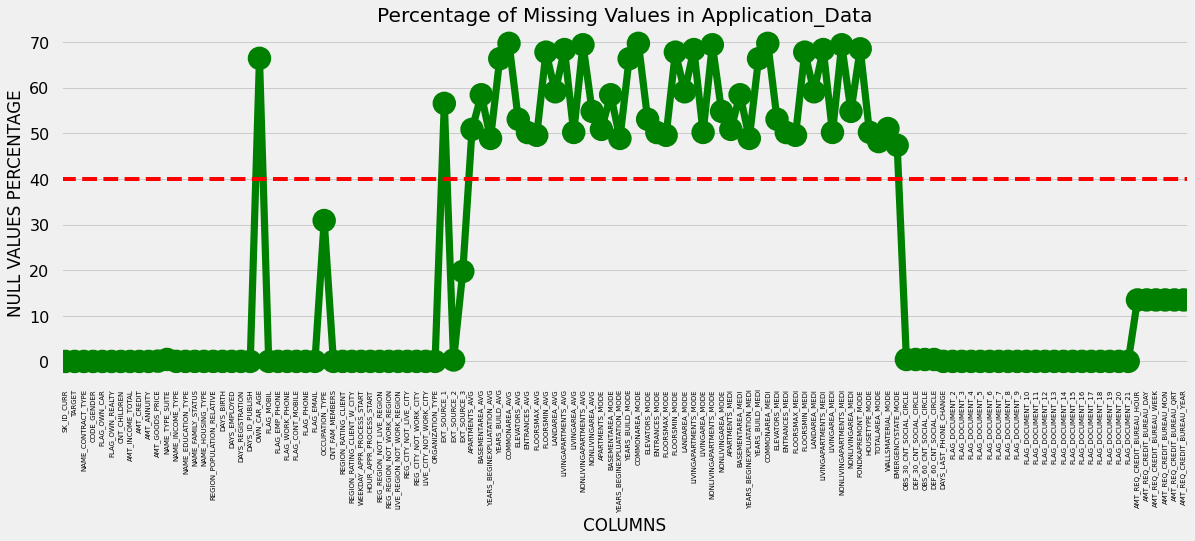

In [ ]:
null_Application = pd.DataFrame((Application_Data.isnull().sum())*100/Application_Data.shape[0]).reset_index()
null_Application.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_Application, color='green')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Application_Data")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [ ]:
app_data_null_40 = null_Application[null_Application["Null Values Percentage"]>=40]
app_data_null_40

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,66.417526
41,EXT_SOURCE_1,56.546392
44,APARTMENTS_AVG,50.850515
45,BASEMENTAREA_AVG,58.440722
46,YEARS_BEGINEXPLUATATION_AVG,48.865979
47,YEARS_BUILD_AVG,66.340206
48,COMMONAREA_AVG,69.703608
49,ELEVATORS_AVG,53.067010
50,ENTRANCES_AVG,50.154639
51,FLOORSMAX_AVG,49.548969


In [ ]:
print('Number of Columns that have missing values greater than 40% :', len(app_data_null_40))


Number of Columns that have missing values greater than 40% : 49


In [ ]:
print('Number of Columns that have missing values greater than 40% :', len(app_data_null_40))


Number of Columns that have missing values greater than 40% : 49


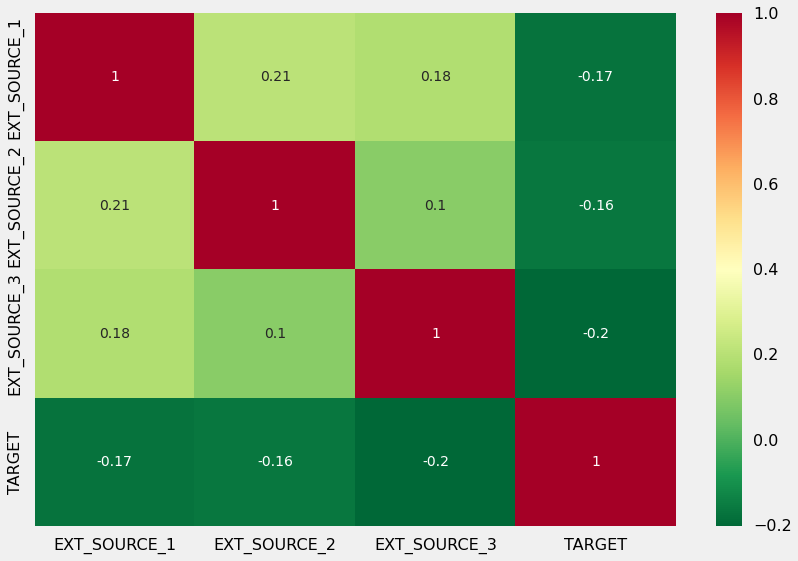

In [ ]:
Source = Application_Data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn_r")

In [ ]:
New_Application = app_data_null_40["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3']
len(New_Application)

51

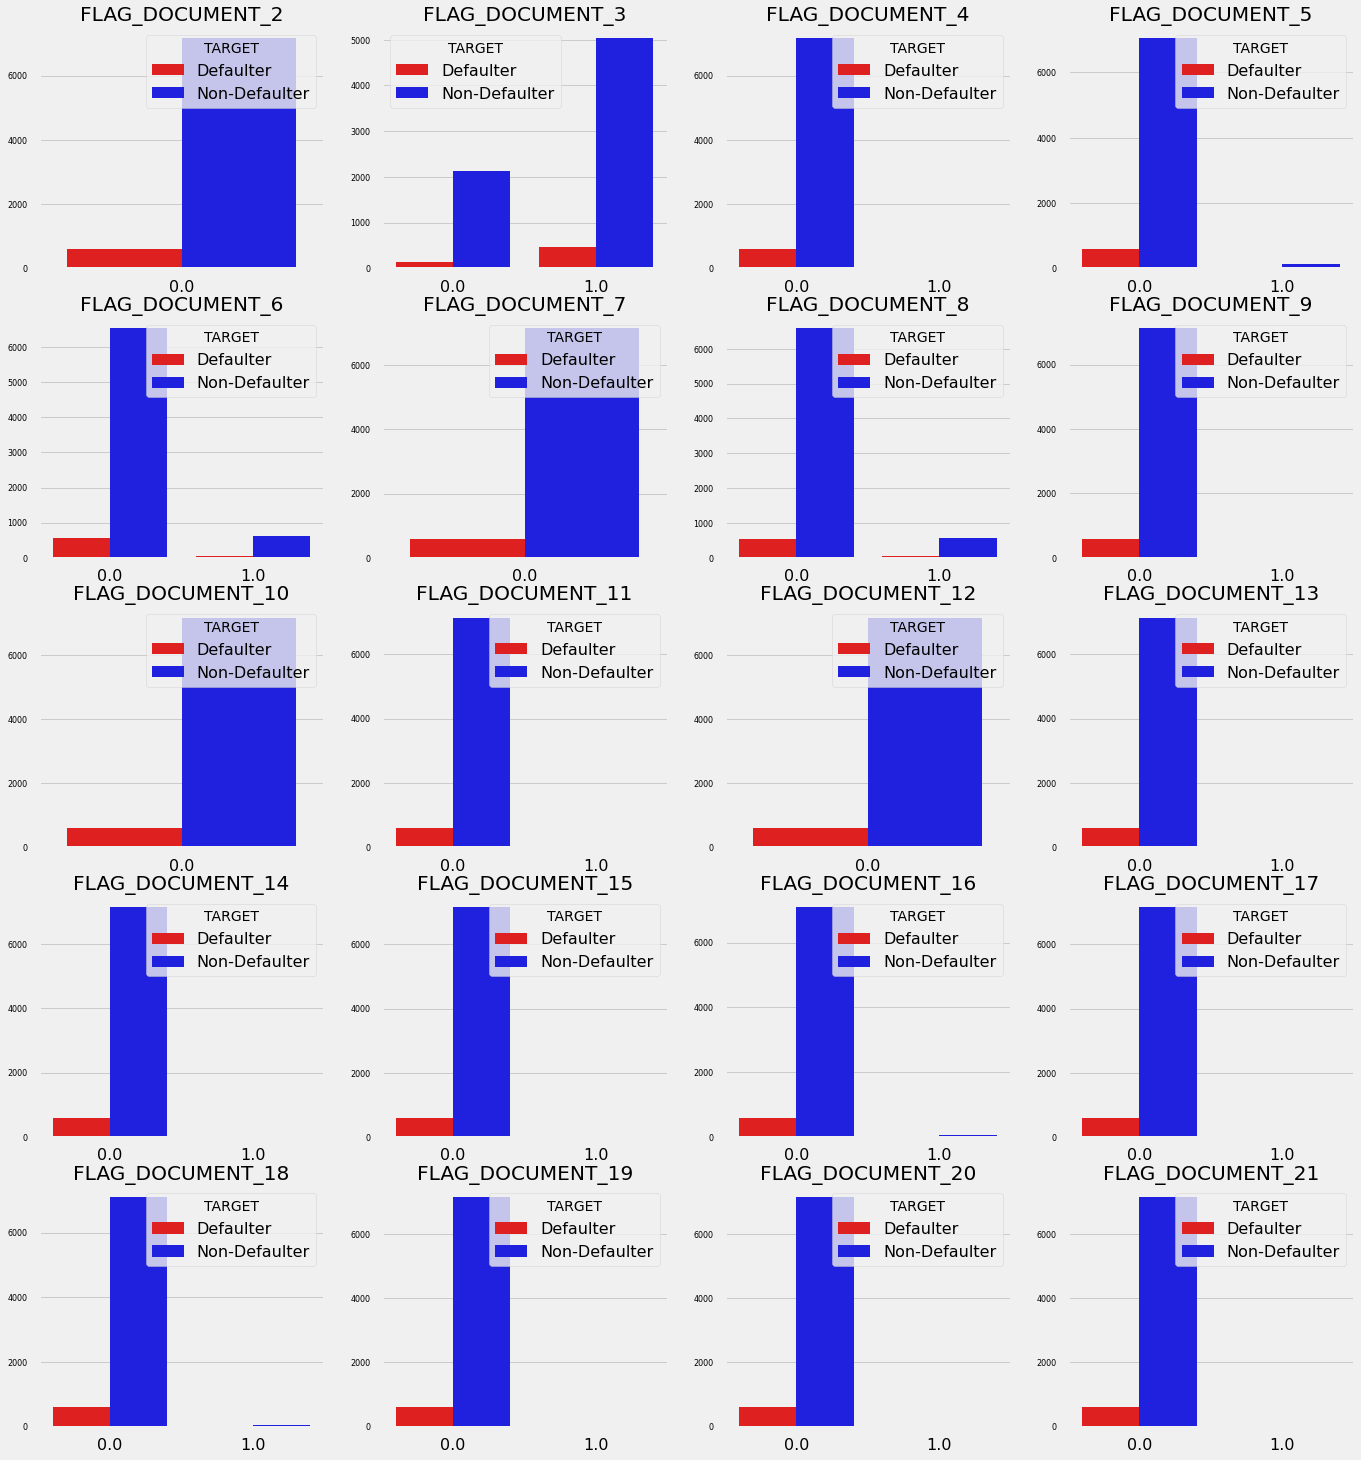

In [ ]:
flag_col = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = Application_Data[flag_col+["TARGET"]]

length = len(flag_col)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Non-Defaulter"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(flag_col,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [ ]:
flag_col.remove('FLAG_DOCUMENT_3')
New_Application = New_Application + flag_col
len(New_Application)

70

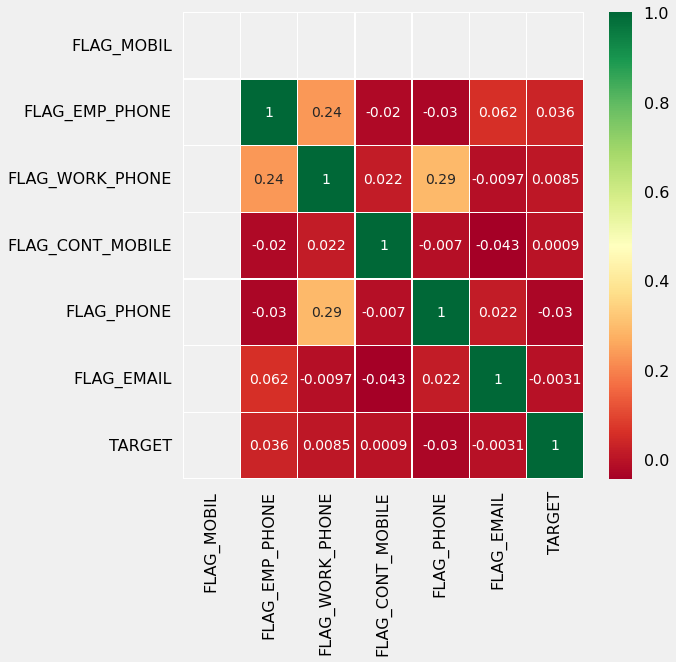

In [ ]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = Application_Data[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=0.5)

In [ ]:
contact_col.remove('TARGET')
New_Application = New_Application + contact_col
len(New_Application)

76

In [ ]:
Application_Data.drop(labels=New_Application,axis=1,inplace=True)


In [ ]:
print('New Shape of the Dataframe: ',Application_Data.shape)


New Shape of the Dataframe:  (7760, 46)


In [ ]:
Application_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   7760 non-null   int64  
 1   TARGET                       7760 non-null   int64  
 2   NAME_CONTRACT_TYPE           7760 non-null   object 
 3   CODE_GENDER                  7760 non-null   object 
 4   FLAG_OWN_CAR                 7760 non-null   object 
 5   FLAG_OWN_REALTY              7760 non-null   object 
 6   CNT_CHILDREN                 7760 non-null   int64  
 7   AMT_INCOME_TOTAL             7760 non-null   float64
 8   AMT_CREDIT                   7760 non-null   float64
 9   AMT_ANNUITY                  7760 non-null   float64
 10  AMT_GOODS_PRICE              7755 non-null   float64
 11  NAME_TYPE_SUITE              7726 non-null   object 
 12  NAME_INCOME_TYPE             7759 non-null   object 
 13  NAME_EDUCATION_TYP

In [ ]:
round(Previous_Application.isnull().sum() / Previous_Application.shape[0] * 100.00,2)


SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    19.11
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               44.69
AMT_GOODS_PRICE                19.49
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              44.69
RATE_INTEREST_PRIMARY          99.57
RATE_INTEREST_PRIVILEGED       99.57
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                47.86
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

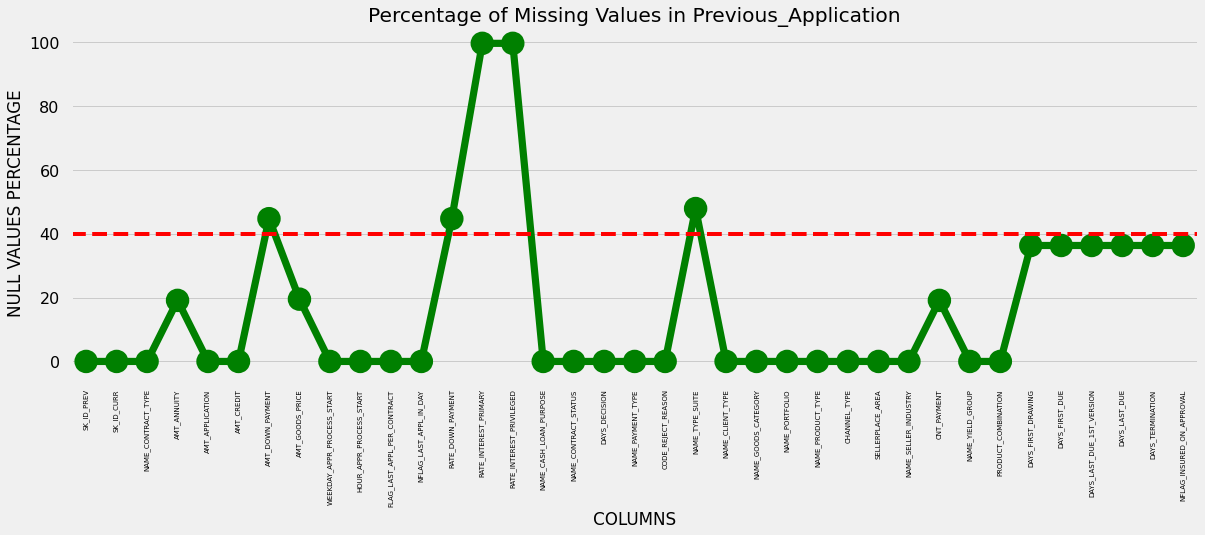

In [ ]:
null_Previous = pd.DataFrame((Previous_Application.isnull().sum())*100/Previous_Application.shape[0]).reset_index()
null_Previous.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_Previous, color='green')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Previous_Application")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [ ]:
prev_app_null_40 = null_Previous[null_Previous["Null Values Percentage"]>=40]
prev_app_null_40

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,44.685415
12,RATE_DOWN_PAYMENT,44.685415
13,RATE_INTEREST_PRIMARY,99.571020
14,RATE_INTEREST_PRIVILEGED,99.571020
20,NAME_TYPE_SUITE,47.855100


In [ ]:
print('Number of Columns that have missing values greater than 40% :', len(prev_app_null_40))


Number of Columns that have missing values greater than 40% : 5


In [ ]:
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [ ]:
New_Previous = prev_app_null_40["Column Name"].tolist()
New_Previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE']

In [ ]:
New_Previous = New_Previous + Unnecessary_previous
len(New_Previous)

17

In [ ]:
Previous_Application.drop(labels=New_Previous,axis=1,inplace=True)


In [ ]:
print('New Shape of the Dataframe: ',Previous_Application.shape)


New Shape of the Dataframe:  (4196, 28)


In [ ]:
print('New Shape of the Dataframe: ',Previous_Application.shape)


New Shape of the Dataframe:  (4196, 28)


In [ ]:
Previous_Application.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_PREV                 4196 non-null   int64  
 1   SK_ID_CURR                 4196 non-null   int64  
 2   NAME_CONTRACT_TYPE         4196 non-null   object 
 3   AMT_ANNUITY                3394 non-null   float64
 4   AMT_APPLICATION            4196 non-null   float64
 5   AMT_CREDIT                 4196 non-null   float64
 6   AMT_GOODS_PRICE            3378 non-null   float64
 7   NAME_CASH_LOAN_PURPOSE     4196 non-null   object 
 8   NAME_CONTRACT_STATUS       4196 non-null   object 
 9   DAYS_DECISION              4196 non-null   int64  
 10  NAME_PAYMENT_TYPE          4196 non-null   object 
 11  CODE_REJECT_REASON         4196 non-null   object 
 12  NAME_CLIENT_TYPE           4196 non-null   object 
 13  NAME_GOODS_CATEGORY        4196 non-null   objec

In [ ]:
days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in days_col:
    Application_Data[col] = abs(Application_Data[col])

In [ ]:
Application_Data['AMT_INCOME_TOTAL'] = Application_Data['AMT_INCOME_TOTAL'] / 100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

Application_Data['AMT_INCOME_RANGE'] = pd.cut(Application_Data['AMT_INCOME_TOTAL'], bins, labels=slot)

In [ ]:
Application_Data['AGE_GROUP'].value_counts(normalize=True)*100


0-20       NaN
20-30      NaN
30-40      NaN
40-50      NaN
50 above   NaN
Name: AGE_GROUP, dtype: float64

In [ ]:
Application_Data['AMT_CREDIT'] = Application_Data['AMT_CREDIT'] / 100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

Application_Data['AMT_CREDIT_RANGE'] = pd.cut(Application_Data['AMT_CREDIT'], bins=bins, labels=slots)

In [ ]:
Application_Data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100


200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [ ]:
Application_Data['AGE'] = Application_Data['DAYS_BIRTH'] // 365

bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

Application_Data['AGE_GROUP']=pd.cut(Application_Data['AGE'], bins=bins, labels=slots)

In [ ]:
Application_Data['AGE_GROUP'].value_counts(normalize=True)*100


0-20       NaN
20-30      NaN
30-40      NaN
40-50      NaN
50 above   NaN
Name: AGE_GROUP, dtype: float64

In [ ]:
Application_Data['YEARS_EMPLOYED'] = Application_Data['DAYS_EMPLOYED'] // 365

bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

Application_Data['EMPLOYMENT_YEAR']=pd.cut(Application_Data['YEARS_EMPLOYED'], bins=bins, labels=slots)

In [ ]:
Application_Data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100


0-5        NaN
5-10       NaN
10-20      NaN
20-30      NaN
30-40      NaN
40-50      NaN
50-60      NaN
60 above   NaN
Name: EMPLOYMENT_YEAR, dtype: float64

In [ ]:
Application_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 127 entries, SK_ID_CURR to EMPLOYMENT_YEAR
dtypes: category(3), float64(65), int64(43), object(16)
memory usage: 291.8+ MB


In [ ]:
#Conversion of Object and Numerical columns to Categorical Columns
numerical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in numerical_columns:
    Application_Data[col] =pd.Categorical(Application_Data[col])
# inspecting the column types if the above conversion is reflected
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 127 entries, SK_ID_CURR to EMPLOYMENT_YEAR
dtypes: category(22), float64(65), int64(36), object(4)
memory usage: 252.8+ MB


In [ ]:
#Converting negative days to positive days
Previous_Application['DAYS_DECISION'] = abs(Previous_Application['DAYS_DECISION'])
#age group calculation e.g. 388 will be grouped as 300-400
Previous_Application['DAYS_DECISION_GROUP'] = (Previous_Application['DAYS_DECISION']-(Previous_Application['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((Previous_Application['DAYS_DECISION'] - (Previous_Application['DAYS_DECISION'] % 400)) + (Previous_Application['DAYS_DECISION'] % 400) + (400 - (Previous_Application['DAYS_DECISION'] % 400))).astype(str)
Previous_Application['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0.0-400.0        37.307182
400.0-800.0      22.942049
800.0-1200.0     12.434192
1200.0-1600.0     7.958167
2400.0-2800.0     6.383929
1600.0-2000.0     5.842523
2000.0-2400.0     5.702215
2800.0-3200.0     1.429603
nan-nan           0.000140
Name: DAYS_DECISION_GROUP, dtype: float64

In [ ]:
Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716283 entries, 0 to 716282
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_PREV                 716283 non-null  int64  
 1   SK_ID_CURR                 716283 non-null  int64  
 2   NAME_CONTRACT_TYPE         716282 non-null  object 
 3   AMT_ANNUITY                557683 non-null  float64
 4   AMT_APPLICATION            716282 non-null  float64
 5   AMT_CREDIT                 716282 non-null  float64
 6   AMT_GOODS_PRICE            552580 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE     716282 non-null  object 
 8   NAME_CONTRACT_STATUS       716282 non-null  object 
 9   DAYS_DECISION              716282 non-null  float64
 10  NAME_PAYMENT_TYPE          716282 non-null  object 
 11  CODE_REJECT_REASON         716282 non-null  object 
 12  NAME_CLIENT_TYPE           716282 non-null  object 
 13  NAME_GOODS_CATEGORY        71

In [ ]:
Object_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Object_col:
    Previous_Application[col] =pd.Categorical(Previous_Application[col])
# inspecting the column types if the above conversion is reflected
Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716283 entries, 0 to 716282
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   SK_ID_PREV                 716283 non-null  int64   
 1   SK_ID_CURR                 716283 non-null  int64   
 2   NAME_CONTRACT_TYPE         716282 non-null  category
 3   AMT_ANNUITY                557683 non-null  float64 
 4   AMT_APPLICATION            716282 non-null  float64 
 5   AMT_CREDIT                 716282 non-null  float64 
 6   AMT_GOODS_PRICE            552580 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     716282 non-null  category
 8   NAME_CONTRACT_STATUS       716282 non-null  category
 9   DAYS_DECISION              716282 non-null  float64 
 10  NAME_PAYMENT_TYPE          716282 non-null  category
 11  CODE_REJECT_REASON         716282 non-null  category
 12  NAME_CLIENT_TYPE           716282 non-null  category
 13  NAME_GOODS_CAT

In [ ]:
Impute_Col = round(Application_Data.isnull().sum() / Application_Data.shape[0] * 100.00,2)
Impute_Col

SK_ID_CURR              0.0
TARGET                  0.0
NAME_CONTRACT_TYPE      0.0
CODE_GENDER             0.0
FLAG_OWN_CAR            0.0
                      ...  
AMT_CREDIT_RANGE        0.0
AGE                     0.0
AGE_GROUP             100.0
YEARS_EMPLOYED          0.0
EMPLOYMENT_YEAR       100.0
Length: 127, dtype: float64

In [ ]:
impute_cols_list = Impute_Col[Impute_Col>0].index.tolist()
print('List of Columns where we need to impute missing values appropriately:\n\n',impute_cols_list)

List of Columns where we need to impute missing values appropriately:

 ['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGA

In [ ]:
null_data = Application_Data[Application_Data.isnull().any(axis=1)]
null_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,4.065975,24700.5,...,0.0,0.0,0.0,0.0,1.0,400k-500k,-26,NaN,-2,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,12.935025,35698.5,...,0.0,0.0,0.0,0.0,0.0,1M Above,-46,NaN,-4,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,1.350000,6750.0,...,0.0,0.0,0.0,0.0,0.0,100K-200K,-53,NaN,-1,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,3.126825,29686.5,...,NaN,NaN,NaN,NaN,NaN,300k-400k,-53,NaN,-9,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,5.130000,21865.5,...,0.0,0.0,0.0,0.0,0.0,500k-600k,-55,NaN,-9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,2.547000,27558.0,...,NaN,NaN,NaN,NaN,NaN,200k-300k,-26,NaN,-1,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,2.695500,12001.5,...,NaN,NaN,NaN,NaN,NaN,200k-300k,-57,NaN,1000,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,6.776640,29979.0,...,0.0,0.0,1.0,0.0,1.0,600k-700k,-42,NaN,-22,NaN
307509,456254,1,Cash loans,F,N,Y,0,171000.0,3.701070,20205.0,...,0.0,0.0,0.0,0.0,0.0,300k-400k,-33,NaN,-14,NaN


In [ ]:
Application_Data['NAME_TYPE_SUITE'].describe()


count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
Application_Data['NAME_TYPE_SUITE'].fillna((Application_Data['NAME_TYPE_SUITE'].mode()[0]),inplace = True)


In [ ]:
Application_Data['OCCUPATION_TYPE'] = Application_Data['OCCUPATION_TYPE'].cat.add_categories('Unknown')
Application_Data['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

In [ ]:
Application_Data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
Amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in Amount:
    Application_Data[col].fillna(Application_Data[col].median(),inplace = True)

In [ ]:
round(Previous_Application.isnull().sum() / Previous_Application.shape[0] * 100.00,2)

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                  22.14
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
AMT_GOODS_PRICE              22.85
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.00
NAME_PAYMENT_TYPE             0.00
CODE_REJECT_REASON            0.00
NAME_CLIENT_TYPE              0.00
NAME_GOODS_CATEGORY           0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
CHANNEL_TYPE                  0.00
SELLERPLACE_AREA              0.00
NAME_SELLER_INDUSTRY          0.00
CNT_PAYMENT                  22.14
NAME_YIELD_GROUP              0.00
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           39.94
DAYS_FIRST_DUE               39.94
DAYS_LAST_DUE_1ST_VERSION    39.94
DAYS_LAST_DUE                39.94
DAYS_TERMINATION             39.94
NFLAG_INSURED_ON_APPROVAL    39.94
DAYS_DECISION_GROUP 

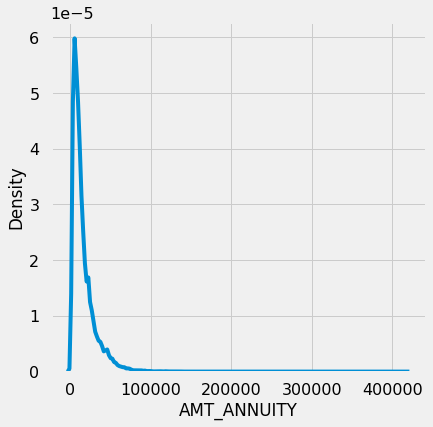

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(Previous_Application['AMT_ANNUITY'])
plt.show()

In [ ]:
Previous_Application['AMT_ANNUITY'].fillna(Previous_Application['AMT_ANNUITY'].median(),inplace = True)


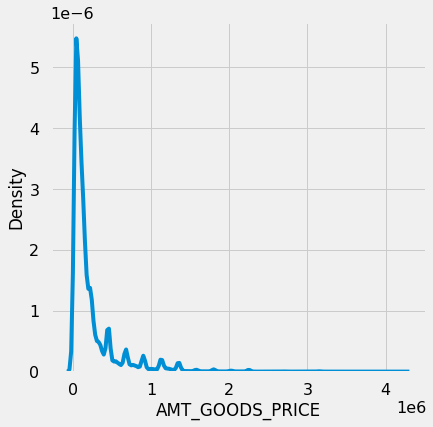

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(Previous_Application['AMT_GOODS_PRICE'][pd.notnull(Previous_Application['AMT_GOODS_PRICE'])])
plt.show()

In [ ]:
Previous_Application['AMT_GOODS_PRICE'].fillna(Previous_Application['AMT_GOODS_PRICE'].mode()[0], inplace=True)


In [ ]:
Previous_Application.loc[Previous_Application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()


Canceled        129945
Refused          17451
Unused offer     11198
Approved             2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [ ]:
Previous_Application['CNT_PAYMENT'].fillna(0,inplace = True)


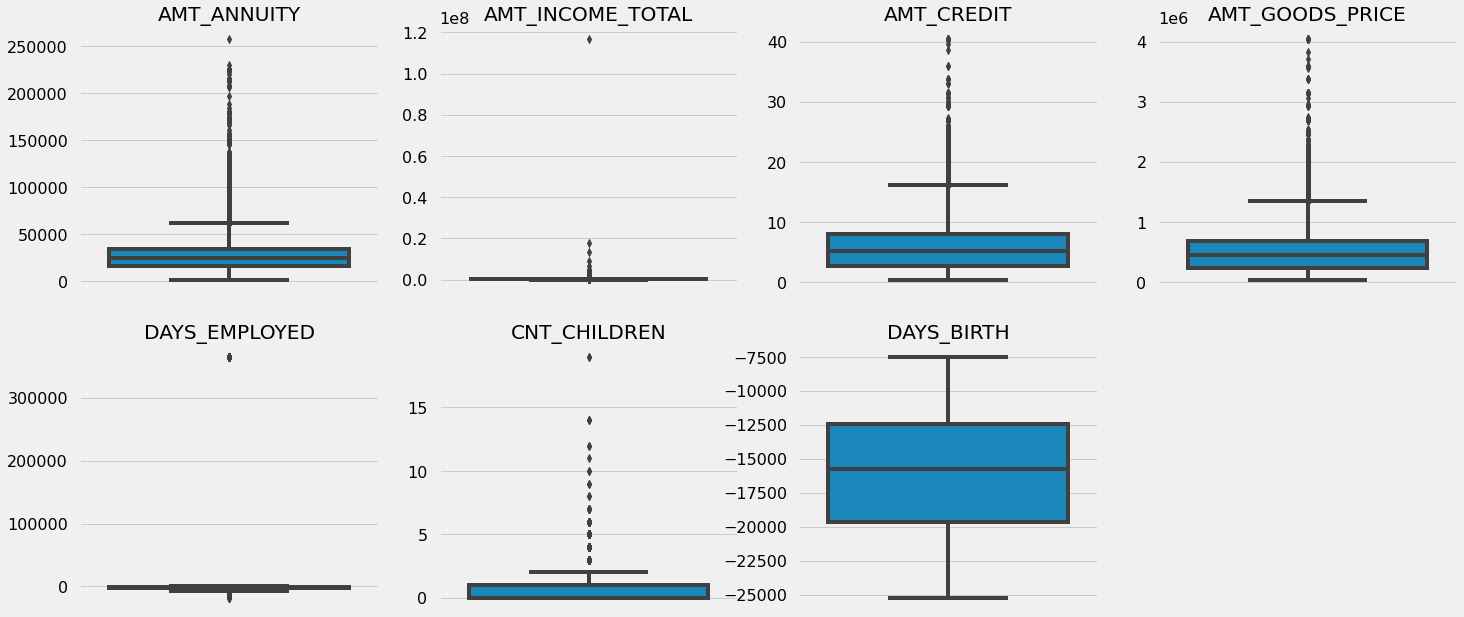

In [ ]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Application_Data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=Application_Data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [ ]:
Application_Data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()


,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979e+05,5.990260,5.383962e+05,-16036.995067,0.417052,63815.045904
std,14493.737315,2.371231e+05,4.024908,3.694465e+05,4363.988632,0.722121,141275.766519
min,1615.500000,2.565000e+04,0.450000,4.050000e+04,-25229.000000,0.000000,-17912.000000
25%,16524.000000,1.125000e+05,2.700000,2.385000e+05,-19682.000000,0.000000,-2760.000000
50%,24903.000000,1.471500e+05,5.135310,4.500000e+05,-15750.000000,0.000000,-1213.000000
75%,34596.000000,2.025000e+05,8.086500,6.795000e+05,-12413.000000,1.000000,-289.000000
max,258025.500000,1.170000e+08,40.500000,4.050000e+06,-7489.000000,19.000000,365243.000000


plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Previous_Application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=Previous_Application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [ ]:
Previous_Application[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()


,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,716283.000000,7.162820e+05,7.162820e+05,7.162830e+05,7.162820e+05,716283.000000,716282.000000
mean,14810.966912,1.734922e+05,1.939909e+05,1.837974e+05,3.194639e+02,12.406314,884.338508
std,13093.974621,2.899890e+05,3.158728e+05,2.844162e+05,8.348034e+03,14.362667,780.332135
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000,2.000000
25%,7459.020000,1.930050e+04,2.433150e+04,4.500000e+04,-1.000000e+00,0.000000,282.000000
50%,11240.865000,7.066125e+04,7.976025e+04,7.066800e+04,4.000000e+00,10.000000,585.000000
75%,16663.702500,1.800000e+05,2.108801e+05,1.800000e+05,8.900000e+01,16.000000,1309.000000
max,418058.145000,4.237875e+06,4.104351e+06,4.237875e+06,4.000000e+06,84.000000,2922.000000


In [ ]:
Imbalance = Application_Data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

NameError: ignored

In [ ]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))


Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


In [ ]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = Application_Data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = Application_Data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,13))

    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1,
                    x = feature,
                    data=Application_Data,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    ax1.legend(['Repayer','Defaulter'])

    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})


    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2,
                    x = feature,
                    y='TARGET',
                    order=cat_perc[feature],
                    data=cat_perc,
                    palette='Set2')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})

    plt.show();

In [ ]:
def bivariate_bar(x,y,df,hue,figsize):

    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df,
                  hue=hue,
                  palette =['g','r'])

    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [ ]:
def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):

    plt.figure(figsize=figsize)
    sns.relplot(x=x,
                y=y,
                data=Application_Data,
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [ ]:
def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col,
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')

    plt.show()

In [ ]:
def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x,
                  y=y,
                  hue="TARGET",
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

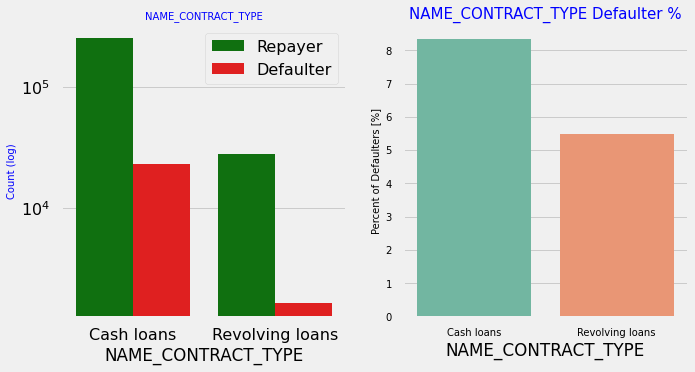

In [ ]:
univariate_categorical('NAME_CONTRACT_TYPE',True)

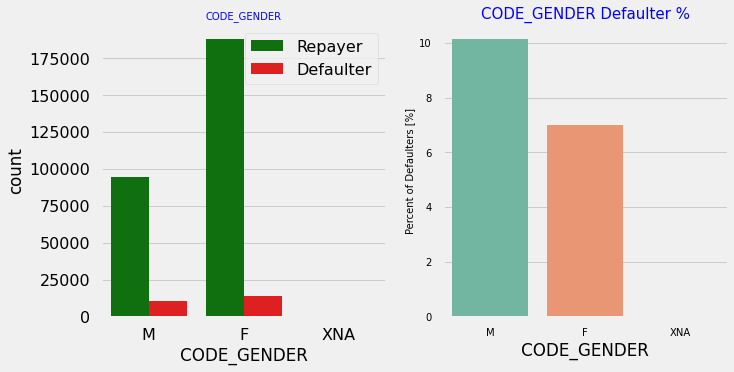

In [ ]:
univariate_categorical('CODE_GENDER')

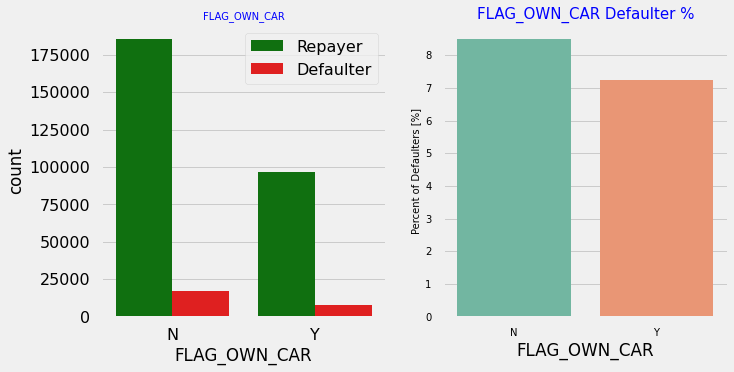

In [ ]:
univariate_categorical('FLAG_OWN_CAR')

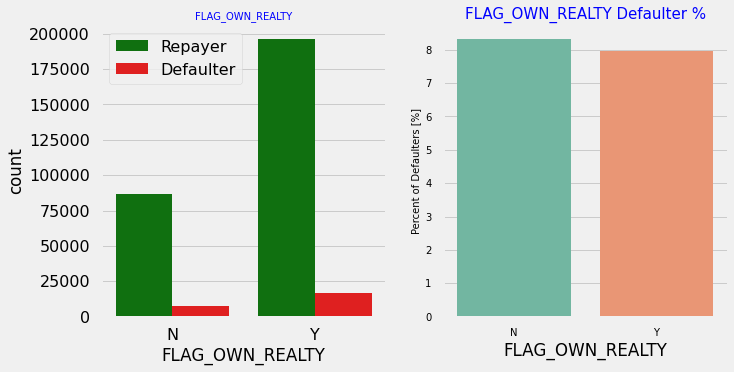

In [ ]:
univariate_categorical('FLAG_OWN_REALTY')


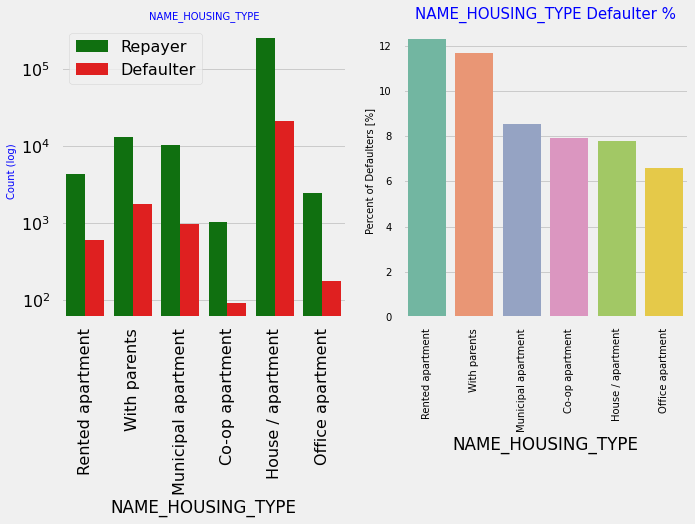

In [ ]:
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)


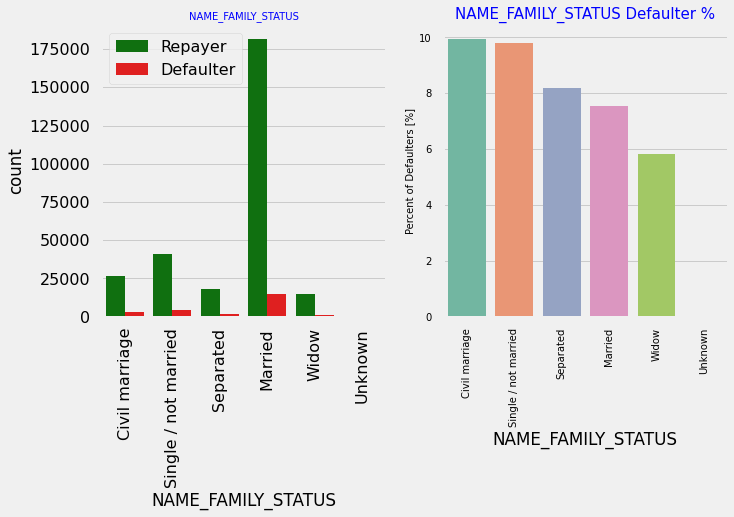

In [ ]:
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)


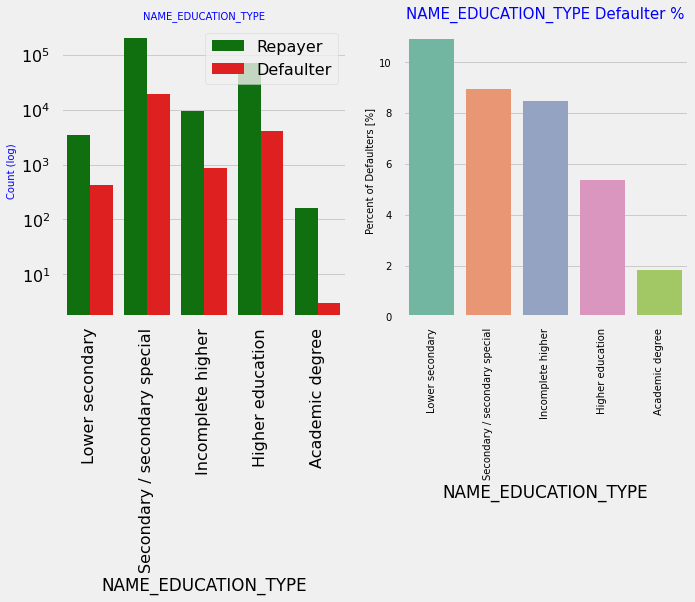

In [ ]:
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)


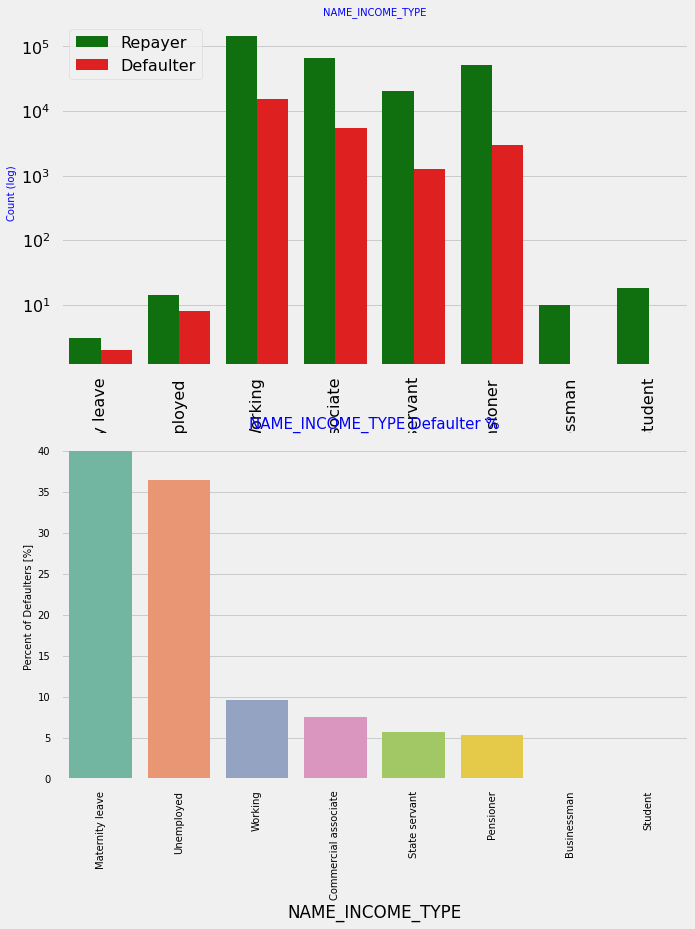

In [ ]:
univariate_categorical("NAME_INCOME_TYPE",True,True,False)


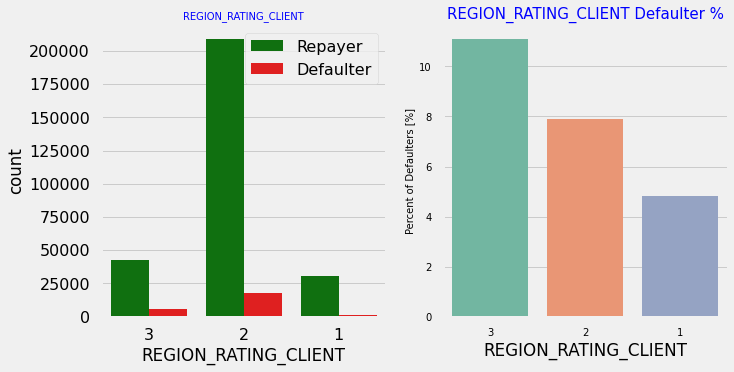

In [ ]:
univariate_categorical("REGION_RATING_CLIENT",False,False,True)


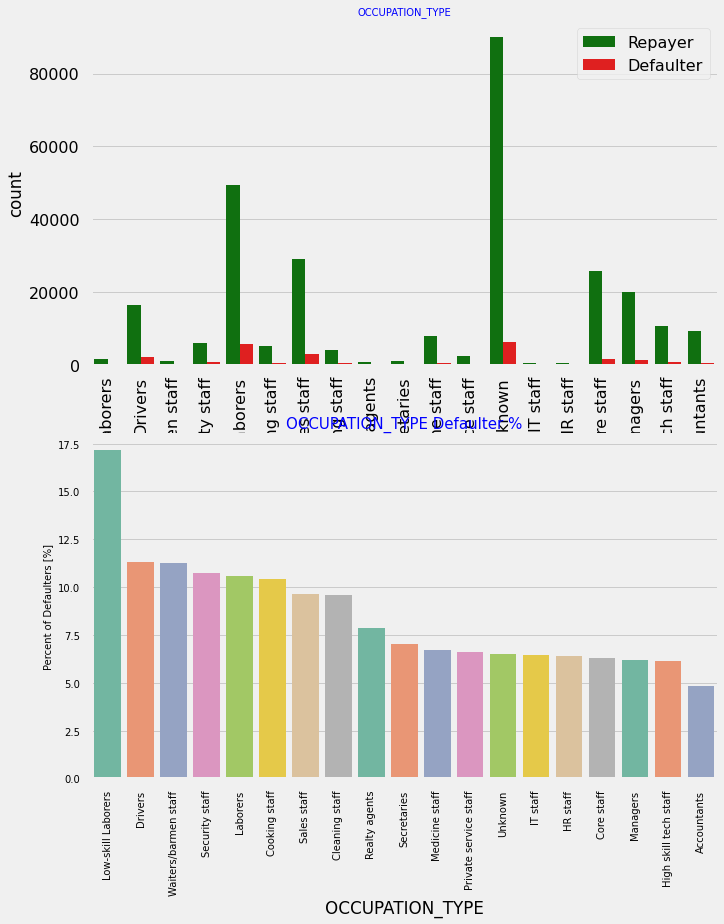

In [ ]:
univariate_categorical("OCCUPATION_TYPE",False,True,False)


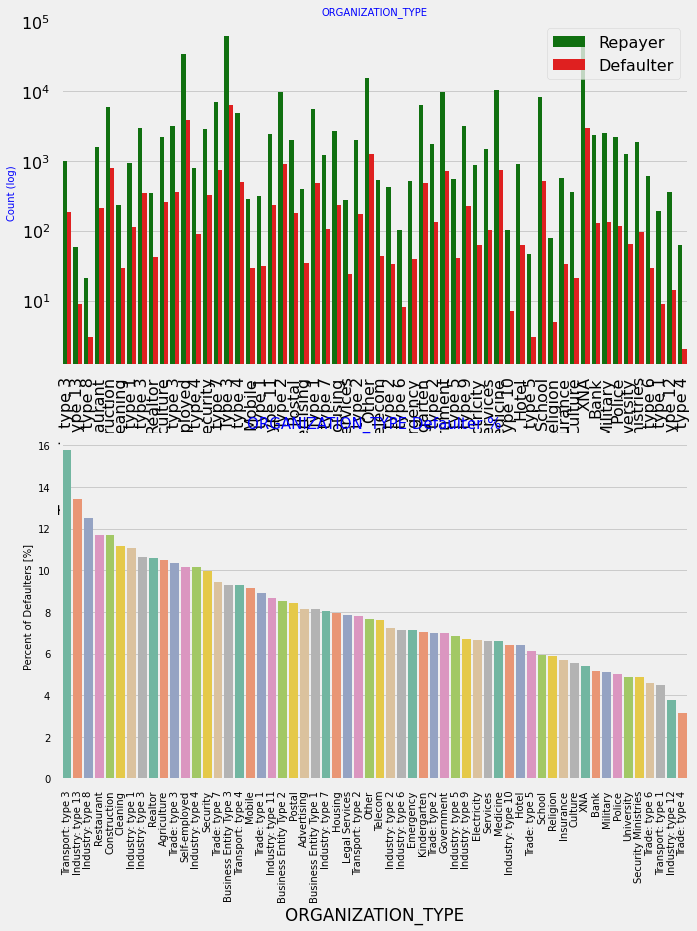

In [ ]:
univariate_categorical("ORGANIZATION_TYPE",True,True,False)


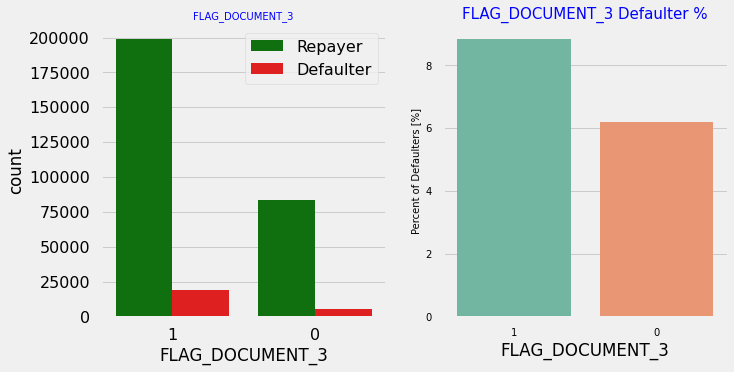

In [ ]:
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)


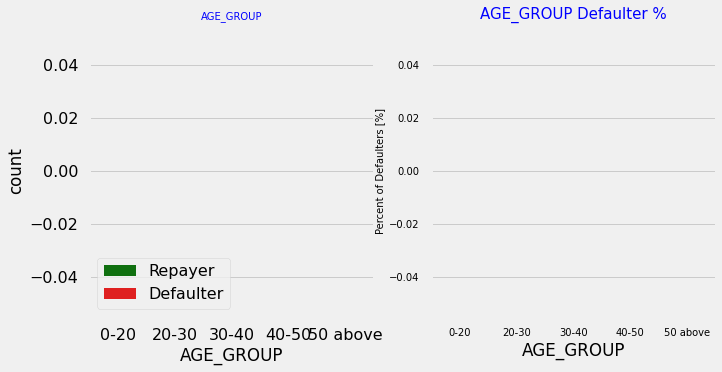

In [ ]:
univariate_categorical("AGE_GROUP",False,False,True)


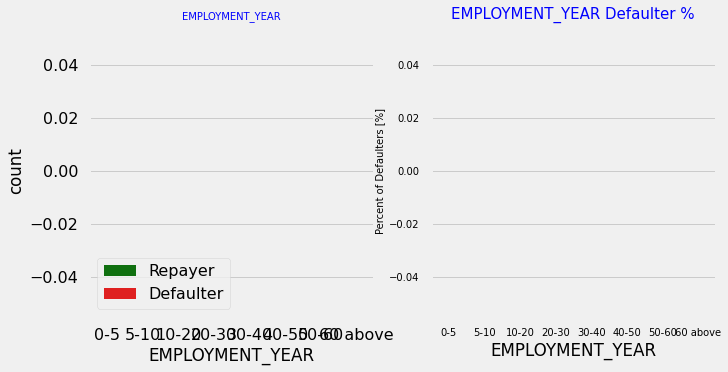

In [ ]:
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)


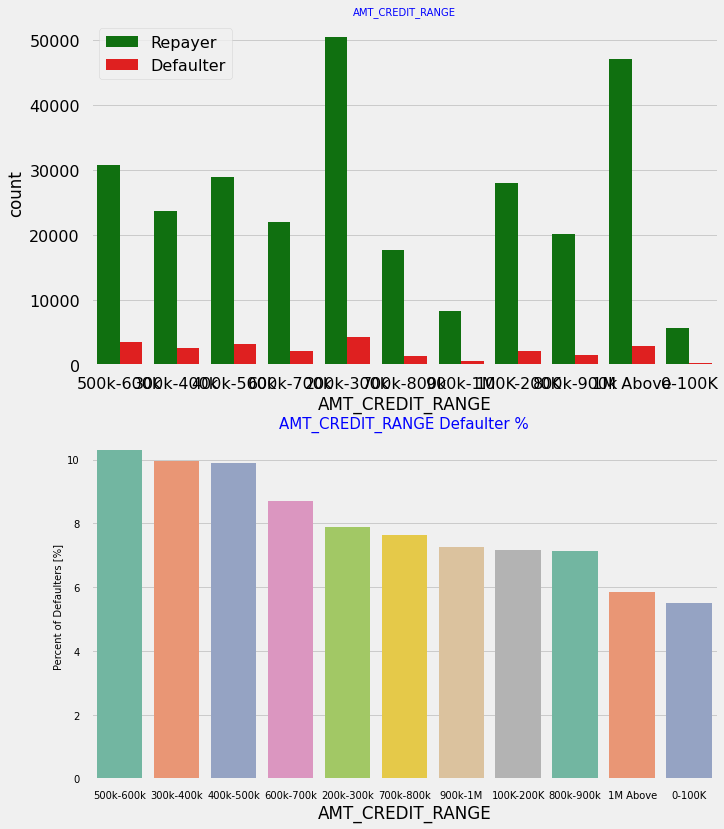

In [ ]:
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)


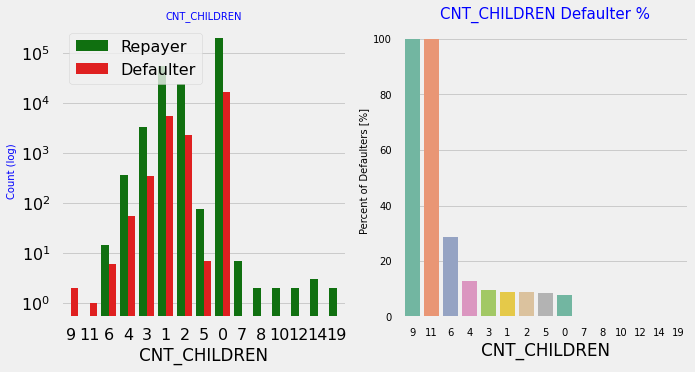

In [ ]:
univariate_categorical("CNT_CHILDREN",True)


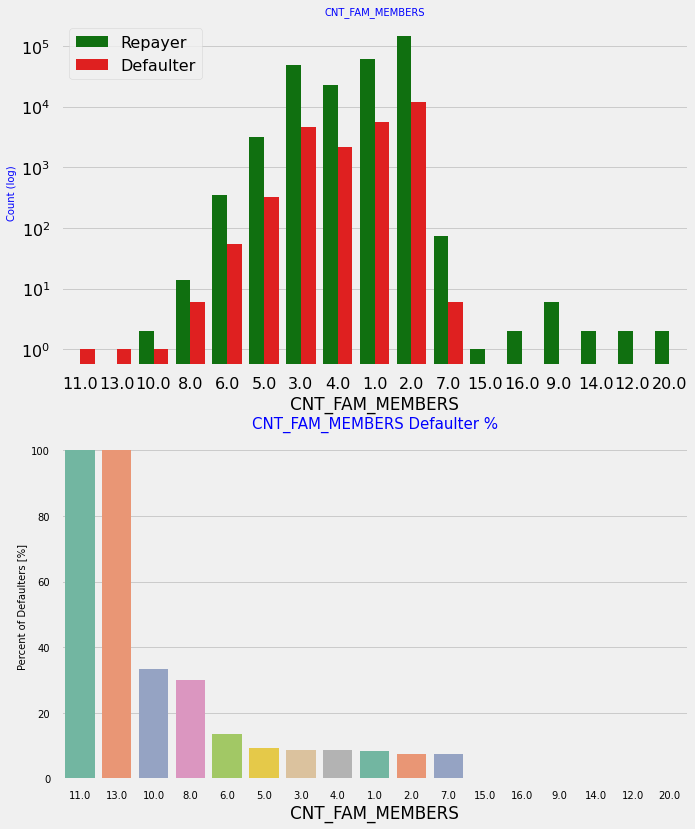

In [ ]:
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)


In [ ]:
Application_Data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()


,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71617.0,202955.327289,147974.151536,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21703.0,179737.969506,100880.579748,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158774.0,163169.889223,307577.685943,25650.0,112500.0,135000.0,202500.0,117000000.0


In [ ]:
Application_Data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()


,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71617.0,202955.327289,147974.151536,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21703.0,179737.969506,100880.579748,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158774.0,163169.889223,307577.685943,25650.0,112500.0,135000.0,202500.0,117000000.0


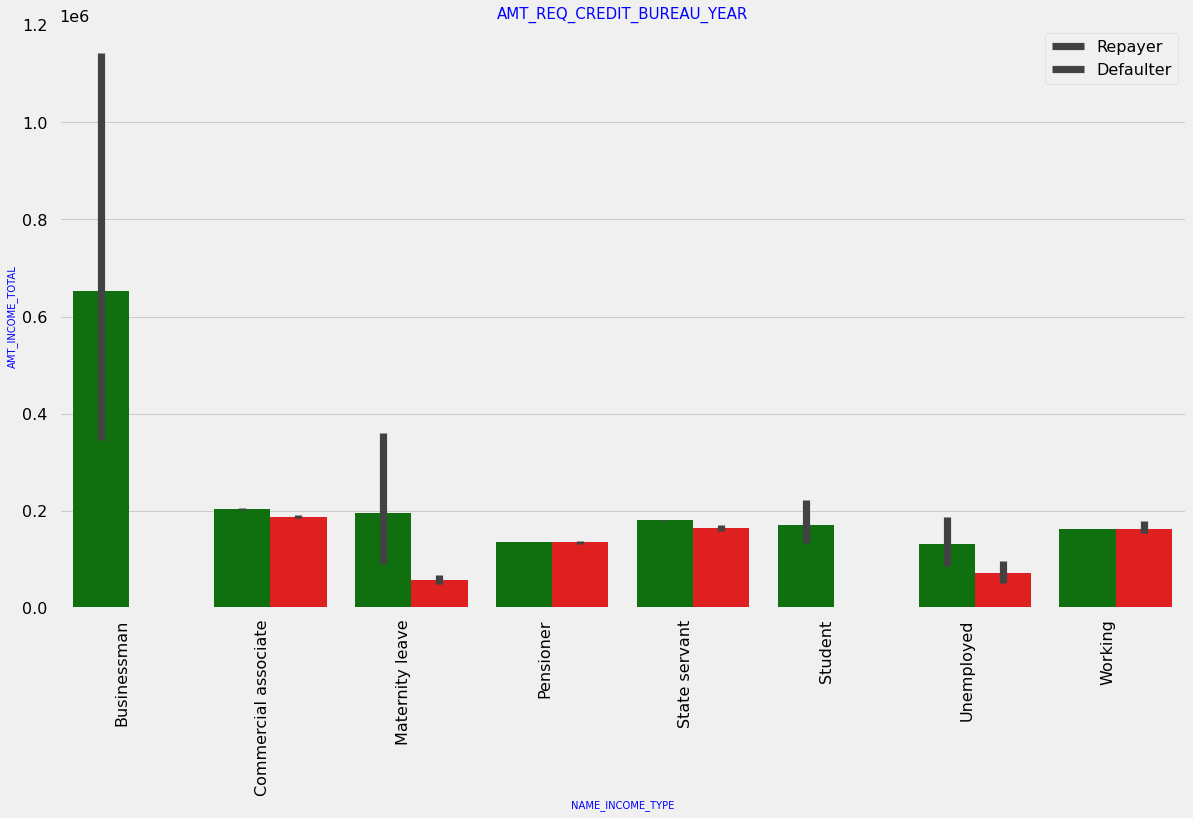

In [ ]:
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",Application_Data,"TARGET",(18,10))


In [ ]:
Application_Data.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_RANGE', 'AGE', 'AGE_GROUP',
       'YEARS_EMPLOYED', 'EMPLOYMENT_YEAR'],
      dtype='object', length=127)

In [ ]:
corr_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = Application_Data.loc[Application_Data['TARGET']==0, corr_cols] # Repayers
Defaulter_df = Application_Data.loc[Application_Data['TARGET']==1, corr_cols]

In [ ]:
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)

In [ ]:
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.618048
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


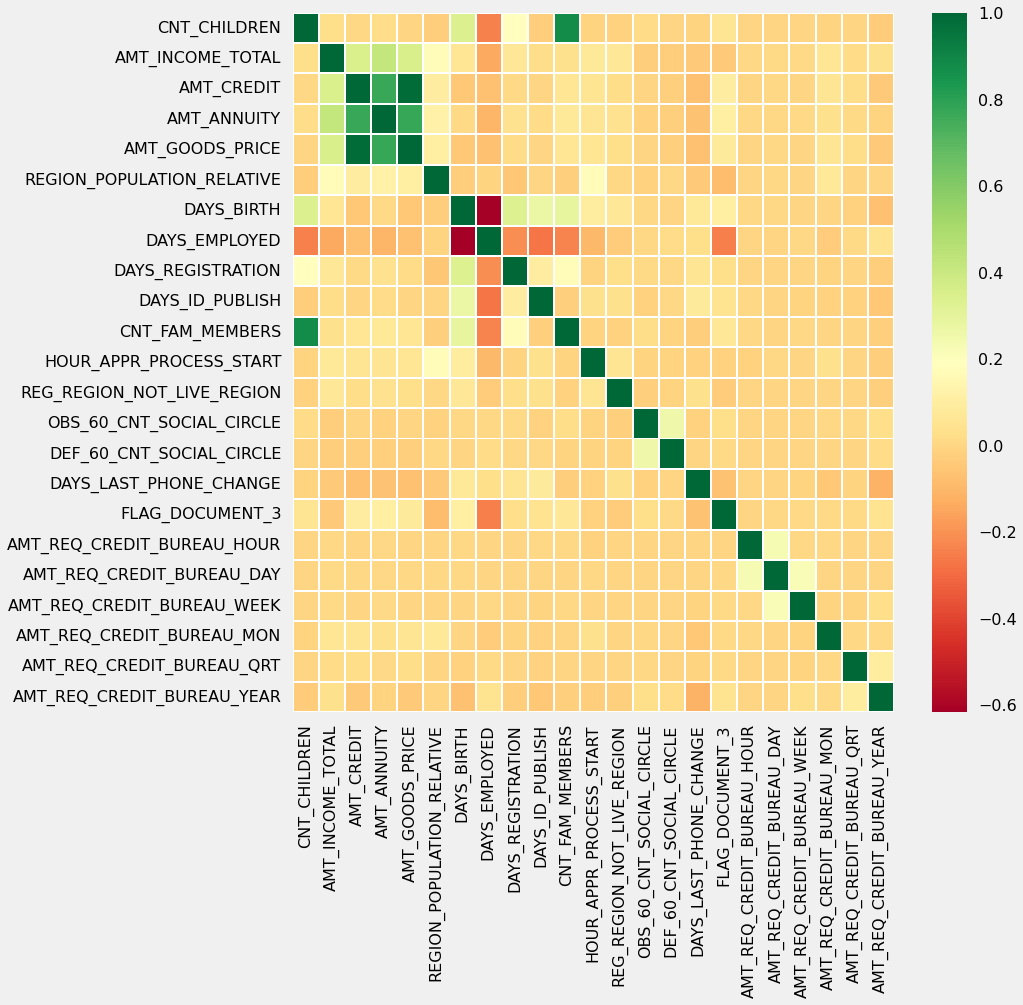

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

In [ ]:
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
71,AMT_ANNUITY,AMT_CREDIT,0.752195
167,DAYS_EMPLOYED,DAYS_BIRTH,0.575097
190,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.273266
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
138,DAYS_BIRTH,CNT_CHILDREN,0.259109
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863


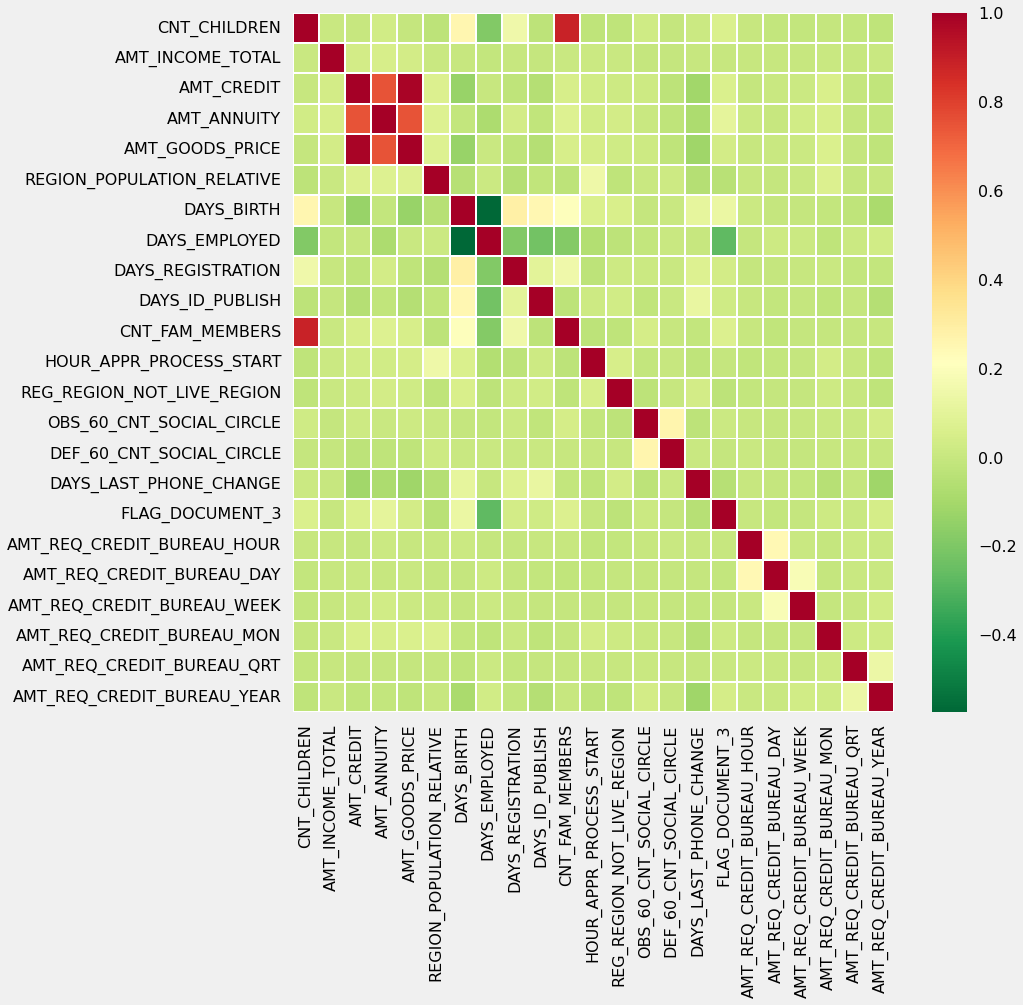

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn_r",annot=False,linewidth =1)

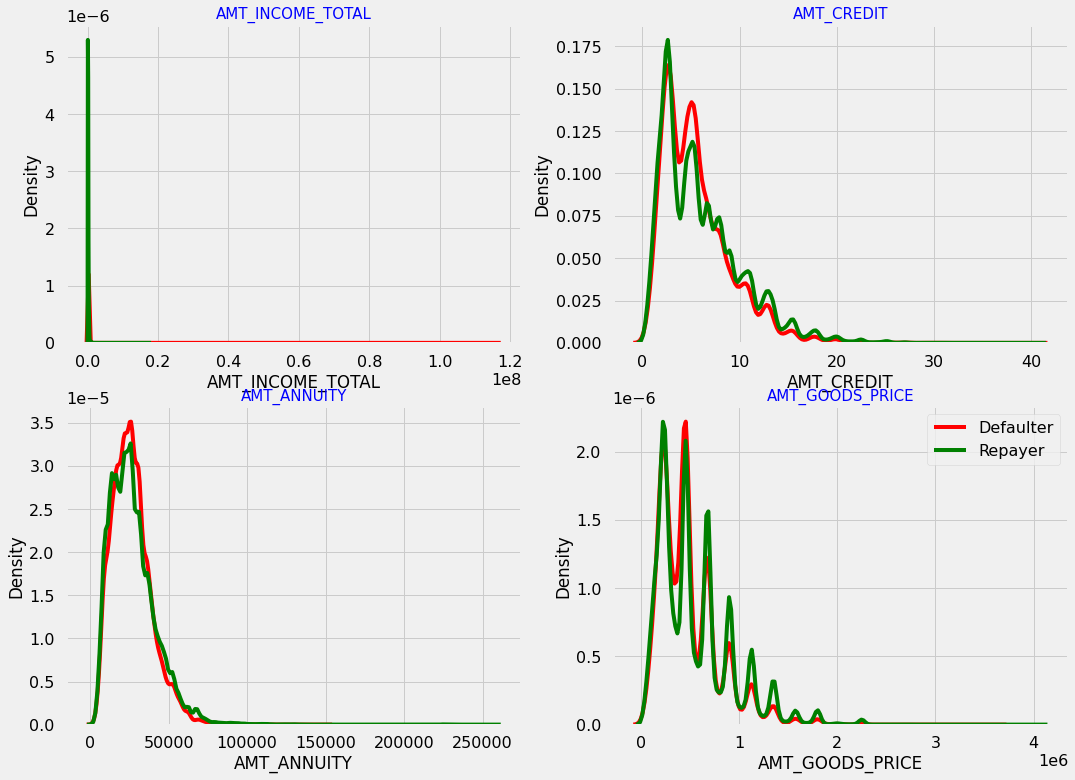

In [ ]:
amount = Application_Data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})

plt.legend()

plt.show()

<Figure size 1080x432 with 0 Axes>

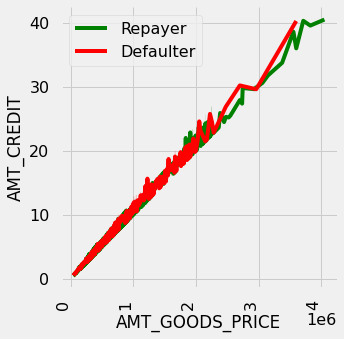

In [ ]:
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',Application_Data,"TARGET", "line", ['g','r'], False,(15,6))


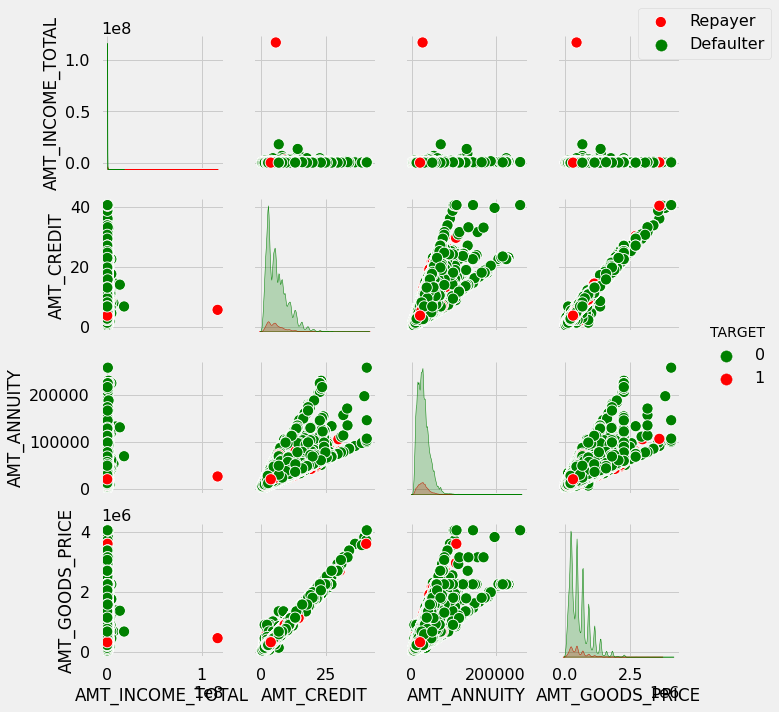

In [ ]:
amount = Application_Data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

In [ ]:
loan_process_df = pd.merge(Application_Data, Previous_Application, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,DAYS_DECISION_GROUP
0,100003,0,Cash loans,F,N,N,0,270000.0,12.935025,35698.5,...,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,400.0-800.0
1,100006,0,Cash loans,F,N,Y,0,135000.0,3.126825,29686.5,...,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0,0.0-400.0
2,100006,0,Cash loans,F,N,Y,0,135000.0,3.126825,29686.5,...,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,0.0-400.0
3,100007,0,Cash loans,M,N,Y,0,121500.0,5.130000,21865.5,...,18.0,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0,800.0-1200.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,5.130000,21865.5,...,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN,800.0-1200.0


In [ ]:
loan_process_df.shape


(606050, 155)

In [ ]:
loan_process_df.size


93937750

In [ ]:
loan_process_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 606050 entries, 0 to 606049
Columns: 155 entries, SK_ID_CURR to DAYS_DECISION_GROUP
dtypes: category(36), float64(78), int64(37), object(4)
memory usage: 575.7+ MB


In [ ]:
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,606050.000000,606050.000000,606050.000000,6.060500e+05,606050.000000,606014.000000,6.055650e+05,606050.000000,606050.000000,606050.000000,...,6.060500e+05,606050.000000,6.060500e+05,606050.000000,367712.000000,367712.000000,367712.000000,367712.000000,367712.000000,367712.000000
mean,278443.109275,0.086391,0.405608,1.736118e+05,5.873430,27012.424800,5.275047e+05,0.020745,-16312.297363,68553.421198,...,1.835832e+05,883.857144,3.218449e+02,12.495217,342581.973768,13406.147817,32896.927196,76581.268691,82198.655051,0.328281
std,102830.694534,0.280940,0.717421,2.374950e+05,3.850094,13962.767976,3.532355e+05,0.013381,4347.941846,145159.775189,...,2.853166e+05,784.679527,9.038856e+03,14.380540,88244.320987,71457.047849,105633.722719,149647.451319,153438.713146,0.469588
min,100003.000000,0.000000,0.000000,2.565000e+04,0.450000,1615.500000,4.050000e+04,0.000290,-25201.000000,-17912.000000,...,0.000000e+00,2.000000,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,189300.000000,0.000000,0.000000,1.125000e+05,2.700000,16803.000000,2.385000e+05,0.010032,-19972.000000,-2829.000000,...,4.500000e+04,273.000000,-1.000000e+00,0.000000,365243.000000,-1631.000000,-1248.000000,-1319.000000,-1272.000000,0.000000
50%,278948.500000,0.000000,0.000000,1.575000e+05,5.084955,24903.000000,4.500000e+05,0.018850,-16033.000000,-1280.000000,...,7.052310e+04,585.000000,5.000000e+00,10.000000,365243.000000,-826.000000,-361.000000,-536.000000,-497.000000,0.000000
75%,367565.750000,0.000000,1.000000,2.099869e+05,8.079840,34537.500000,6.795000e+05,0.028663,-12724.000000,-286.000000,...,1.800000e+05,1321.000000,9.000000e+01,16.000000,365243.000000,-407.000000,131.000000,-73.000000,-43.000000,1.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,39.562740,220297.500000,3.825000e+06,0.072508,-7489.000000,365243.000000,...,4.050000e+06,2922.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1]

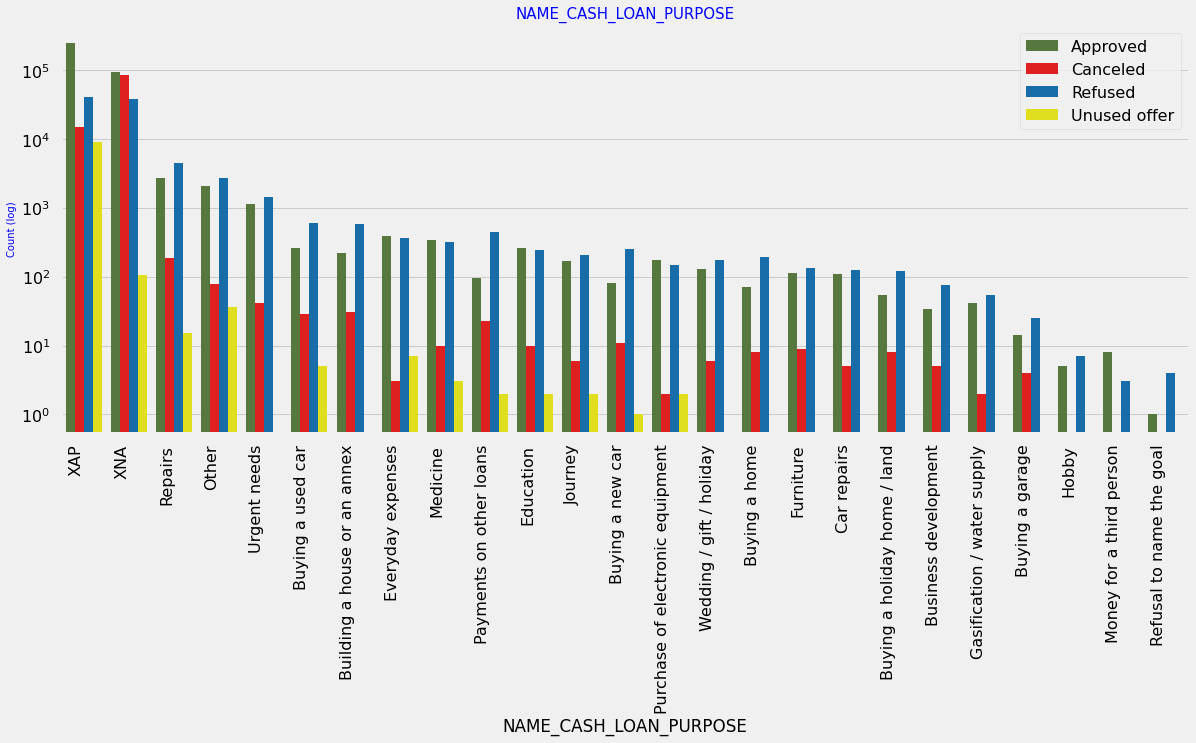

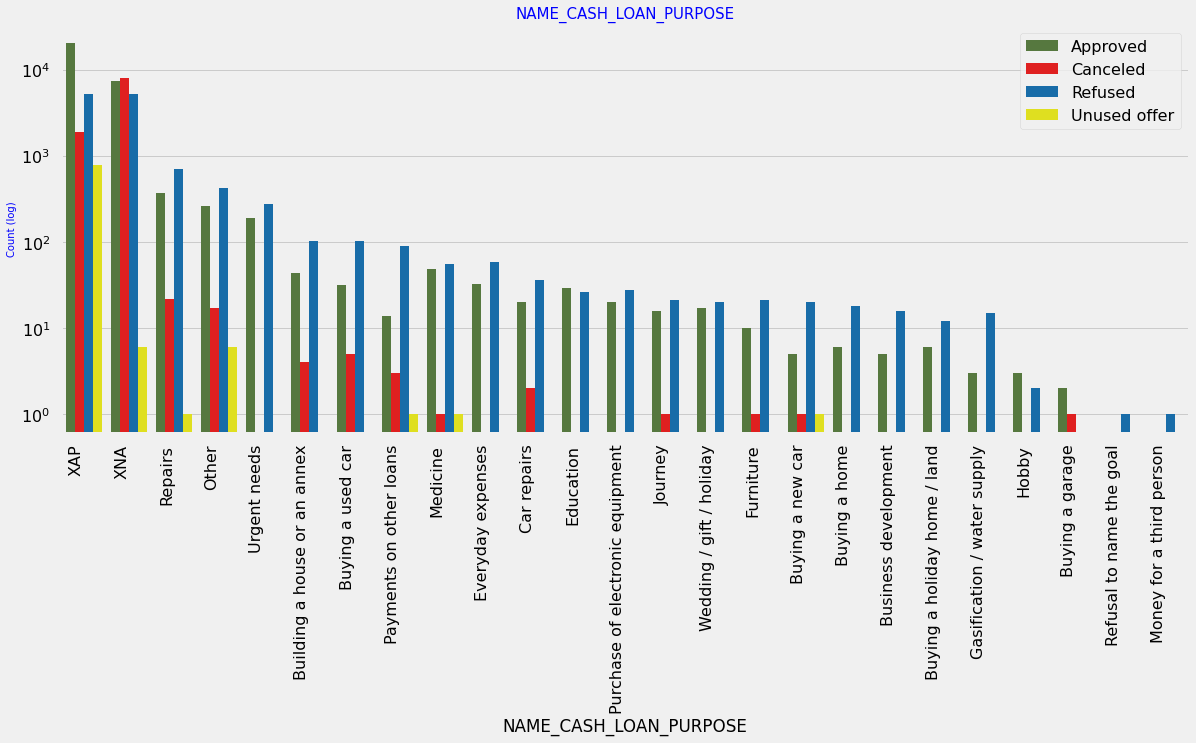

In [ ]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

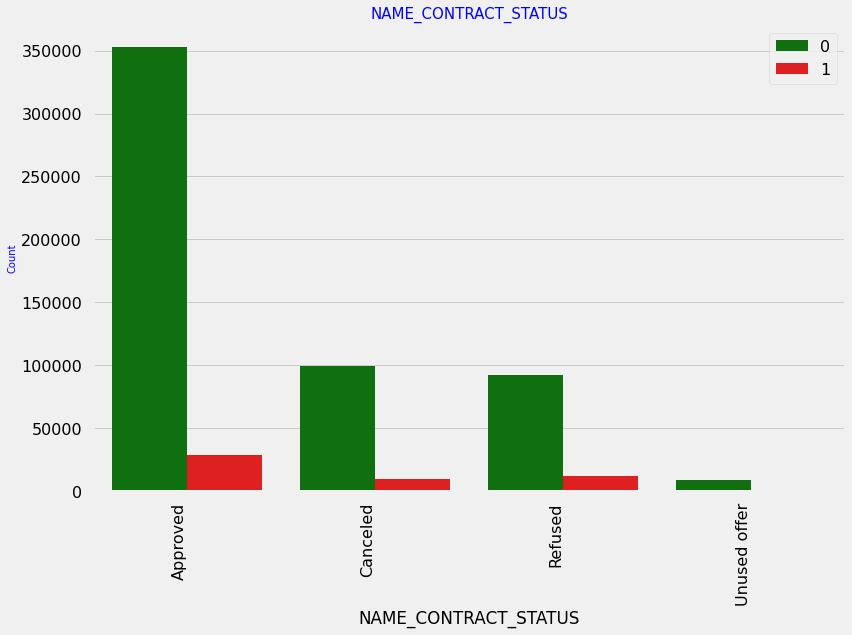

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       352818     92.42%
                     1        28928      7.58%
Canceled             0        99629     90.82%
                     1        10074      9.18%
Refused              0        92092     88.01%
                     1        12549     11.99%
Unused offer         0         9154     91.91%
                     1          806      8.09%


In [ ]:
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

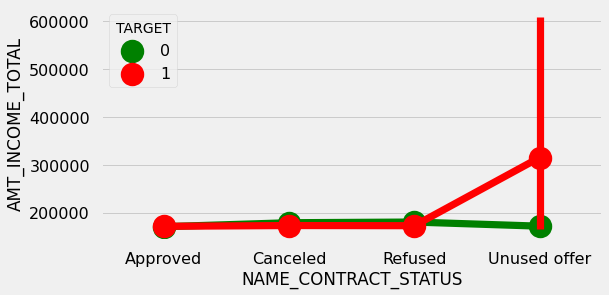

In [ ]:
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')


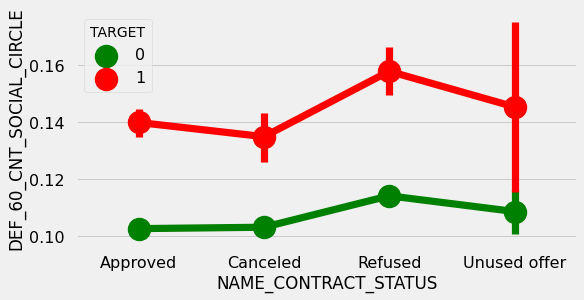

In [ ]:
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')
